На основе данного кейса необходимо оценить эффективность работы продукта (т.е. сайта) с помощью оценки ключевых показателей:
1. Прирост покупателей (User Growth Rate);
2. Churn Rate And Retaintion Rate;
3. Daily Active User (DAU);
4. Monthly Active User (MAU);
5. Наиболее популярные продаваемые товары;
6. Товары с самым высоким доходом;
7. Объем выручки разделить.

In [1]:
import pandas as pd
import warnings
login_logs = pd.read_csv("login_logs.csv")
sales_orders = pd.read_csv("sales_orders.csv")
sales_orders_items = pd.read_csv("sales_orders_items.csv")

In [2]:
login_logs

,login_log_id,user_id,login_time
0,1385328,99160,2021-07-01 00:00:33.0
1,1385329,83272,2021-07-01 00:00:38.0
2,1385330,83272,2021-07-01 00:00:42.0
3,1385331,96640,2021-07-01 00:02:08.0
4,1385332,99160,2021-07-01 00:02:38.0
...,...,...,...
666352,4670509,207632,2022-07-30 23:47:02.0
666353,4670510,207632,2022-07-30 23:49:39.0
666354,4670511,207632,2022-07-30 23:49:43.0
666355,4670512,111788,2022-07-30 23:51:22.0


In [3]:
sales_orders

,order_id,fk_buyer_id,fk_depot_id,sales_order_status,creation_time
0,119874,82228,5,Rejected,2021-07-01 00:35:28.0
1,119877,40476,1,Rejected,2021-07-01 02:02:43.0
2,119880,41728,8,Shipped,2021-07-01 02:42:12.0
3,119883,97616,4,Rejected,2021-07-01 02:56:00.0
4,119886,12440,1,Rejected,2021-07-01 03:11:31.0
...,...,...,...,...,...
13625,318960,63380,10,Rejected,2022-07-30 16:02:58.0
13626,318963,69544,5,Rejected,2022-07-30 16:30:26.0
13627,318966,167048,1,Shipped,2022-07-30 16:57:31.0
13628,318969,122360,2,Rejected,2022-07-30 17:53:54.0


In [4]:
sales_orders_items

,order_item_id,fk_product_id,fk_order_id,ordered_quantity,order_quantity_accepted,rate
0,62609,7818,119874,1,0,4993.00
1,62610,7607,119877,1,0,6203.40
2,62611,9916,119880,2,2,2904.41
3,62612,11118,119880,2,2,2205.00
4,62613,12702,119880,2,2,2200.85
...,...,...,...,...,...,...
20483,157584,10975,318966,1,1,12632.00
20484,157585,10975,318966,1,0,11814.00
20485,157586,10975,318966,1,1,10110.00
20486,157587,3284,318969,1,0,5271.00


<div class="alert alert-block alert-warning">
<b> 1. Прирост покупателей (User Growth Rate)</b>
</div>

In [5]:
sales_orders['Month'] = pd.to_datetime(sales_orders['creation_time']).dt.month 
sales_orders['Week'] = pd.to_datetime(sales_orders['creation_time']).dt.week
sales_orders['Year'] = pd.to_datetime(sales_orders['creation_time']).dt.year
sales_orders['Day'] = pd.to_datetime(sales_orders['creation_time']).dt.day
warnings.filterwarnings('ignore')

C:\Users\rozan\AppData\Local\Temp/ipykernel_12636/193553835.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  sales_orders['Week'] = pd.to_datetime(sales_orders['creation_time']).dt.week


In [6]:
newgr = sales_orders.groupby(['Year', 'Day'])['fk_buyer_id'].nunique()
newgr = newgr.to_frame().reset_index()
newgr

,Year,Day,fk_buyer_id
0,2021,1,110
1,2021,2,127
2,2021,3,116
3,2021,4,61
4,2021,5,187
5,2021,6,173
6,2021,7,180
7,2021,8,173
8,2021,9,165
9,2021,10,168


In [7]:
newgr21 = newgr.iloc[:30]
newgr22 = (newgr.iloc[30:]).reset_index()
newgr21.drop(columns=['Year'], inplace=True)
newgr22.drop(columns=['Year', 'index'], inplace=True)
# pliz = pd.merge(newgr21, newgr22, on='Day', how='inner')
# pliz.drop(columns=['Year_x', 'index', 'Year_y'], inplace=True)
# pliz.rename(columns={'fk_buyer_id_x':'Days 2021', 'fk_buyer_id_y':'Days 2022'}, inplace=True)
# pliz['Абсолютный прирост, человек'] = pliz['Weeks 2022'] - pliz['Weeks 2021']
# pliz['Относительный прирост, %'] = (pliz['Weeks 2022'] / pliz['Weeks 2021'] * 100 - 100).round(2)
# pliz

In [8]:
newgr21.rename(columns={'fk_buyer_id':'Кол-во пользователей'}, inplace=True)
newgr21['Абсолютный прирост, человек'] = newgr21['Кол-во пользователей'] - newgr21['Кол-во пользователей'].shift(1)
newgr21['Относительный прирост, %'] = (newgr21['Кол-во пользователей'] / newgr21['Кол-во пользователей'].shift(1) * 100 - 100).round(2)
newgr21

,Day,Кол-во пользователей,"Абсолютный прирост, человек","Относительный прирост, %"
0,1,110,NaN,NaN
1,2,127,17.0,15.45
2,3,116,-11.0,-8.66
3,4,61,-55.0,-47.41
4,5,187,126.0,206.56
5,6,173,-14.0,-7.49
6,7,180,7.0,4.05
7,8,173,-7.0,-3.89
8,9,165,-8.0,-4.62
9,10,168,3.0,1.82


In [9]:
newgr22.rename(columns={'fk_buyer_id':'Кол-во пользователей'}, inplace=True)
newgr22['Абсолютный прирост, человек'] = newgr22['Кол-во пользователей'] - newgr22['Кол-во пользователей'].shift(1)
newgr22['Относительный прирост, %'] = (newgr22['Кол-во пользователей'] / newgr22['Кол-во пользователей'].shift(1) * 100 - 100).round(2)
newgr22

,Day,Кол-во пользователей,"Абсолютный прирост, человек","Относительный прирост, %"
0,1,143,NaN,NaN
1,2,182,39.0,27.27
2,3,90,-92.0,-50.55
3,4,257,167.0,185.56
4,5,222,-35.0,-13.62
5,6,167,-55.0,-24.77
6,7,205,38.0,22.75
7,8,197,-8.0,-3.90
8,9,149,-48.0,-24.37
9,10,57,-92.0,-61.74


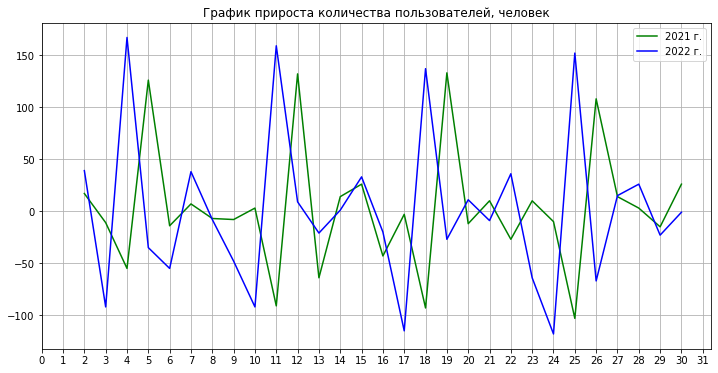

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))
plt.plot(newgr21['Day'], newgr21['Абсолютный прирост, человек'], color='g')
plt.plot(newgr22['Day'], newgr22['Абсолютный прирост, человек'], color='b')

plt.title('График прироста количества пользователей, человек')
plt.legend(['2021 г.', '2022 г.'])
plt.grid()
plt.xticks(np.arange(0,32,1))
plt.show()

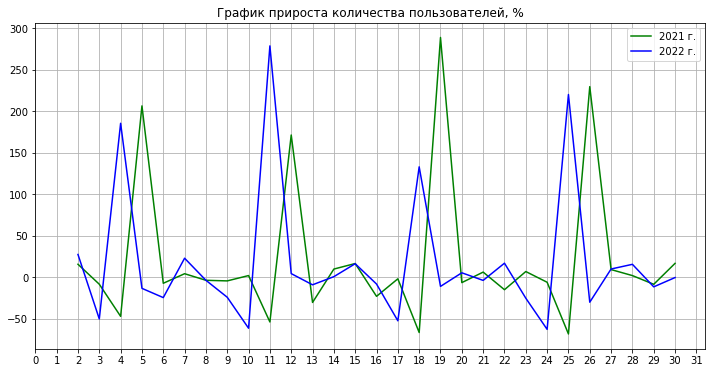

In [11]:
plt.figure(figsize=(12,6))
plt.plot(newgr21['Day'], newgr21['Относительный прирост, %'], color='g')
plt.plot(newgr22['Day'], newgr22['Относительный прирост, %'], color='b')

plt.title('График прироста количества пользователей, %')
plt.legend(['2021 г.', '2022 г.'])
plt.grid()
plt.xticks(np.arange(0,32,1))
plt.show()

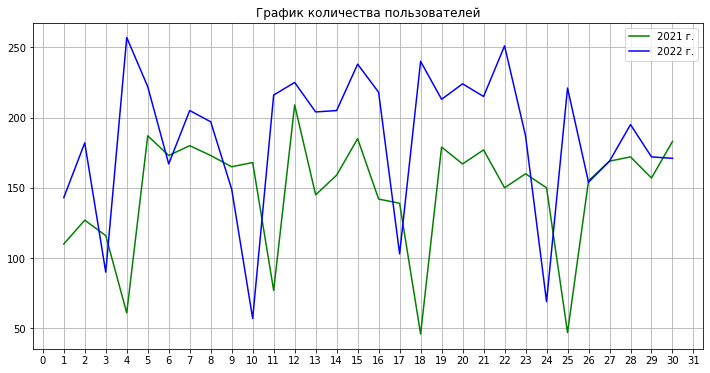

In [12]:
plt.figure(figsize=(12,6))
plt.plot(newgr21['Day'], newgr21['Кол-во пользователей'], color='g')
plt.plot(newgr22['Day'], newgr22['Кол-во пользователей'], color='b')

plt.title('График количества пользователей')
plt.legend(['2021 г.', '2022 г.'])
plt.grid()
plt.xticks(np.arange(0,32,1))
plt.show()

<div class="alert alert-block alert-warning">
<b> 2. Churn Rate And Retaintion Rate </b>
</div>

In [13]:
login_logs['Week'] = pd.to_datetime(login_logs['login_time']).dt.week
warnings.filterwarnings('ignore')

In [14]:
pop = login_logs.groupby('user_id', as_index=False)['login_time'].min()
pop['Year'] = pd.to_datetime(pop['login_time']).dt.year
pop['Month'] = pd.to_datetime(pop['login_time']).dt.month
pop['Week'] = pd.to_datetime(pop['login_time']).dt.week
pop['Day'] = pd.to_datetime(pop['login_time']).dt.day
pop
warnings.filterwarnings('ignore')

In [15]:
login_logs['Year'] = pd.to_datetime(login_logs['login_time']).dt.year
popfull = login_logs.groupby(['Year', 'Week'])['user_id'].nunique()
popfull = popfull.to_frame().reset_index()
popfull.rename(columns={'user_id':'Кол-во пользователей'}, inplace=True)
popfull

,Year,Week,Кол-во пользователей
0,2021,26,3446
1,2021,27,4911
2,2021,28,5155
3,2021,29,5197
4,2021,30,4187
5,2022,26,4361
6,2022,27,7332
7,2022,28,6947
8,2022,29,6856
9,2022,30,6172


In [16]:
popmin = pop.groupby(['Year', 'Week'])['user_id'].nunique()
popmin = popmin.to_frame().reset_index()
popmin.rename(columns={'user_id':'Кол-во вернувшихся'}, inplace=True)
popmin

,Year,Week,Кол-во вернувшихся
0,2021,26,3446
1,2021,27,2795
2,2021,28,1971
3,2021,29,1677
4,2021,30,978
5,2022,26,2914
6,2022,27,2960
7,2022,28,1555
8,2022,29,1228
9,2022,30,758


In [17]:
rrcr = pd.merge(popfull, popmin, on=['Year','Week'], how='inner')
rrcr['RR'] = (rrcr['Кол-во вернувшихся'] / rrcr['Кол-во пользователей']).round(2)
rrcr['CR'] = (1 - rrcr['RR']).round(2)
rrcr

,Year,Week,Кол-во пользователей,Кол-во вернувшихся,RR,CR
0,2021,26,3446,3446,1.00,0.00
1,2021,27,4911,2795,0.57,0.43
2,2021,28,5155,1971,0.38,0.62
3,2021,29,5197,1677,0.32,0.68
4,2021,30,4187,978,0.23,0.77
5,2022,26,4361,2914,0.67,0.33
6,2022,27,7332,2960,0.40,0.60
7,2022,28,6947,1555,0.22,0.78
8,2022,29,6856,1228,0.18,0.82
9,2022,30,6172,758,0.12,0.88


### Теперь сделаем по дням, а не по неделям =)

In [18]:
proba = pd.merge(login_logs, sales_orders, left_on='user_id', right_on='fk_buyer_id', how='left')
# proba.drop(columns=['Week_x', 'Day', 'Year_x', 'Month', 'Week_y', 'Year_y'], inplace=True) #'Month_x', 'Month_y',
proba['login_time'] = proba['login_time'].astype('datetime64[ns]')
proba['login_day'] = proba['login_time'].dt.to_period('D')
proba['creation_time'] = proba['creation_time'].astype('datetime64[ns]')
proba['creation_day'] = proba['creation_time'].dt.to_period('D')
proba

,login_log_id,user_id,login_time,Week_x,Year_x,order_id,fk_buyer_id,fk_depot_id,sales_order_status,creation_time,Month,Week_y,Year_y,Day,login_day,creation_day
0,1385328,99160,2021-07-01 00:00:33,26,2021,126408.0,99160.0,9.0,Shipped,2021-07-11 22:59:43,7.0,27.0,2021.0,11.0,2021-07-01,2021-07-11
1,1385328,99160,2021-07-01 00:00:33,26,2021,138030.0,99160.0,9.0,Rejected,2021-07-30 07:43:51,7.0,30.0,2021.0,30.0,2021-07-01,2021-07-30
2,1385328,99160,2021-07-01 00:00:33,26,2021,138039.0,99160.0,9.0,Rejected,2021-07-30 07:47:29,7.0,30.0,2021.0,30.0,2021-07-01,2021-07-30
3,1385328,99160,2021-07-01 00:00:33,26,2021,138078.0,99160.0,9.0,Shipped,2021-07-30 08:24:19,7.0,30.0,2021.0,30.0,2021-07-01,2021-07-30
4,1385329,83272,2021-07-01 00:00:38,26,2021,121407.0,83272.0,5.0,Rejected,2021-07-04 05:37:18,7.0,26.0,2021.0,4.0,2021-07-01,2021-07-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385388,4670512,111788,2022-07-30 23:51:22,30,2022,310506.0,111788.0,9.0,Shipped,2022-07-19 07:18:29,7.0,29.0,2022.0,19.0,2022-07-30,2022-07-19
2385389,4670513,111788,2022-07-30 23:51:37,30,2022,300621.0,111788.0,9.0,Rejected,2022-07-06 08:07:38,7.0,27.0,2022.0,6.0,2022-07-30,2022-07-06
2385390,4670513,111788,2022-07-30 23:51:37,30,2022,300810.0,111788.0,9.0,Shipped,2022-07-06 10:51:08,7.0,27.0,2022.0,6.0,2022-07-30,2022-07-06
2385391,4670513,111788,2022-07-30 23:51:37,30,2022,310470.0,111788.0,9.0,Rejected,2022-07-19 07:06:04,7.0,29.0,2022.0,19.0,2022-07-30,2022-07-19


In [22]:
proba = proba[proba['creation_time'] > proba['login_time']]
proba21 = proba[(proba['login_day'] <= '31.12.2021')&(proba['creation_day'] <= '31.12.2021')]
proba21['difference'] = proba21['creation_day'] - proba21['login_day']
proba21['loginn_day'] = proba21['login_day'].dt.day

import pandas as pd
kog21 = pd.pivot_table(proba21, values='user_id', index=['loginn_day'], columns=['difference'], 
                       aggfunc=pd.Series.nunique, fill_value= 0)

xop21 = pd.merge(kog21, pliz2, left_on='loginn_day', right_on='Day')
xop21.drop(columns=['DAU 2022', 'Day'], inplace=True)
xop21

,<0 * Days>,<Day>,<2 * Days>,<3 * Days>,<4 * Days>,<5 * Days>,<6 * Days>,<7 * Days>,<8 * Days>,<9 * Days>,...,<21 * Days>,<22 * Days>,<23 * Days>,<24 * Days>,<25 * Days>,<26 * Days>,<27 * Days>,<28 * Days>,<29 * Days>,DAU 2021
0,110,60,49,26,71,59,63,61,57,65,...,32,40,30,18,48,48,45,34,48,1563
1,127,55,27,77,61,59,55,61,60,28,...,32,33,13,47,48,42,34,48,0,1519
2,116,27,81,59,49,59,48,58,20,53,...,29,15,48,36,39,34,44,0,0,1485
3,61,70,44,45,48,53,48,18,50,32,...,13,42,30,40,30,44,0,0,0,1128
4,187,79,71,62,59,72,30,76,52,49,...,48,47,42,39,59,0,0,0,0,1536
5,173,83,61,67,62,26,74,41,52,61,...,48,42,37,43,0,0,0,0,0,1507
6,179,86,67,70,26,78,52,48,63,51,...,48,39,56,0,0,0,0,0,0,1526
7,173,82,77,27,80,52,50,48,49,44,...,42,53,0,0,0,0,0,0,0,1586
8,165,80,32,83,46,51,53,44,40,20,...,43,0,0,0,0,0,0,0,0,1561
9,168,34,87,49,55,58,37,48,21,56,...,0,0,0,0,0,0,0,0,0,1551


<AxesSubplot:>

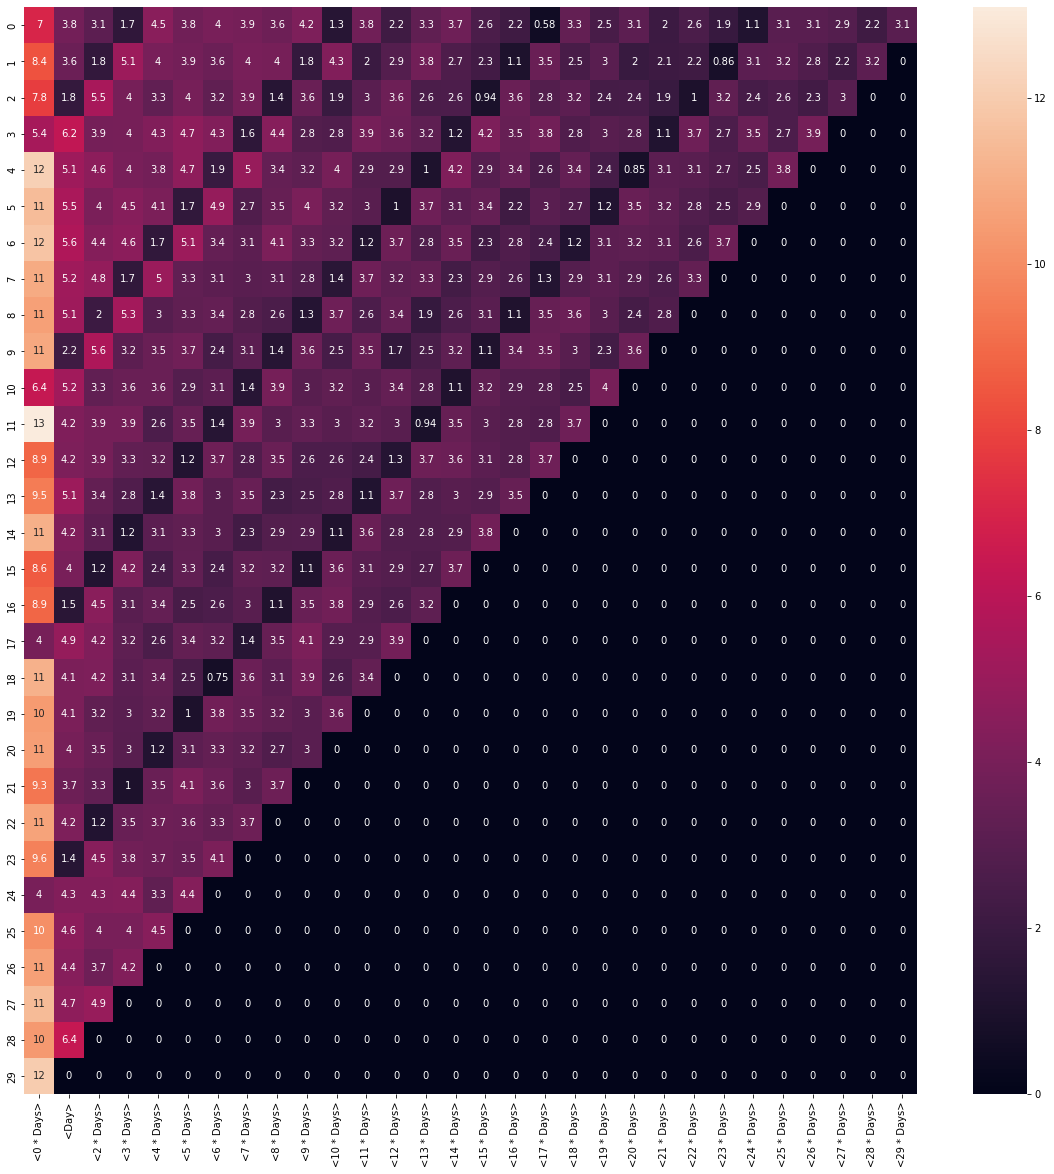

In [23]:
rr21 = round(xop21.div(xop21['DAU 2021'], axis=0)*100,2)
rr21.drop(columns=['DAU 2021'], inplace=True)

import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(rr21, annot=True)

In [24]:
cr21 = rr21 - 100
cr21

,<0 * Days>,<Day>,<2 * Days>,<3 * Days>,<4 * Days>,<5 * Days>,<6 * Days>,<7 * Days>,<8 * Days>,<9 * Days>,...,<20 * Days>,<21 * Days>,<22 * Days>,<23 * Days>,<24 * Days>,<25 * Days>,<26 * Days>,<27 * Days>,<28 * Days>,<29 * Days>
0,-92.96,-96.16,-96.87,-98.34,-95.46,-96.23,-95.97,-96.10,-96.35,-95.84,...,-96.87,-97.95,-97.44,-98.08,-98.85,-96.93,-96.93,-97.12,-97.82,-96.93
1,-91.64,-96.38,-98.22,-94.93,-95.98,-96.12,-96.38,-95.98,-96.05,-98.16,...,-98.03,-97.89,-97.83,-99.14,-96.91,-96.84,-97.24,-97.76,-96.84,-100.00
2,-92.19,-98.18,-94.55,-96.03,-96.70,-96.03,-96.77,-96.09,-98.65,-96.43,...,-97.58,-98.05,-98.99,-96.77,-97.58,-97.37,-97.71,-97.04,-100.00,-100.00
3,-94.59,-93.79,-96.10,-96.01,-95.74,-95.30,-95.74,-98.40,-95.57,-97.16,...,-97.16,-98.85,-96.28,-97.34,-96.45,-97.34,-96.10,-100.00,-100.00,-100.00
4,-87.83,-94.86,-95.38,-95.96,-96.16,-95.31,-98.05,-95.05,-96.61,-96.81,...,-99.15,-96.88,-96.94,-97.27,-97.46,-96.16,-100.00,-100.00,-100.00,-100.00
5,-88.52,-94.49,-95.95,-95.55,-95.89,-98.27,-95.09,-97.28,-96.55,-95.95,...,-96.48,-96.81,-97.21,-97.54,-97.15,-100.00,-100.00,-100.00,-100.00,-100.00
6,-88.27,-94.36,-95.61,-95.41,-98.30,-94.89,-96.59,-96.85,-95.87,-96.66,...,-96.79,-96.85,-97.44,-96.33,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00
7,-89.09,-94.83,-95.15,-98.30,-94.96,-96.72,-96.85,-96.97,-96.91,-97.23,...,-97.10,-97.35,-96.66,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00
8,-89.43,-94.88,-97.95,-94.68,-97.05,-96.73,-96.60,-97.18,-97.44,-98.72,...,-97.63,-97.25,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00
9,-89.17,-97.81,-94.39,-96.84,-96.45,-96.26,-97.61,-96.91,-98.65,-96.39,...,-96.39,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00


In [25]:
proba22 = proba[(proba['login_day'] > '31.12.2021')&(proba['creation_day'] > '31.12.2021')]
proba22['difference'] = proba22['creation_day'] - proba22['login_day']
proba22['loginn_day'] = proba22['login_day'].dt.day

kog22 = pd.pivot_table(proba22, values='user_id', index=['loginn_day'], columns=['difference'], aggfunc=pd.Series.nunique, fill_value= 0)

xop22 = pd.merge(kog22, pliz2, left_on='loginn_day', right_on='Day')
xop22.drop(columns=['DAU 2021', 'Day'], inplace=True)
xop22

,<0 * Days>,<Day>,<2 * Days>,<3 * Days>,<4 * Days>,<5 * Days>,<6 * Days>,<7 * Days>,<8 * Days>,<9 * Days>,...,<21 * Days>,<22 * Days>,<23 * Days>,<24 * Days>,<25 * Days>,<26 * Days>,<27 * Days>,<28 * Days>,<29 * Days>,DAU 2022
0,143,93,37,93,78,62,70,71,44,20,...,74,56,23,57,48,59,62,63,56,2073
1,182,43,119,97,64,64,76,47,21,74,...,57,24,66,55,53,69,68,56,0,2329
2,90,110,83,62,60,71,49,19,67,71,...,20,58,38,61,62,56,46,0,0,2010
3,257,131,87,85,92,57,27,92,77,79,...,76,56,64,68,72,61,0,0,0,2701
4,222,99,92,100,46,26,89,87,81,84,...,59,62,70,74,54,0,0,0,0,2556
5,167,116,89,53,22,75,80,69,82,83,...,61,59,68,53,0,0,0,0,0,2230
6,205,120,72,27,89,90,82,95,82,90,...,68,77,62,0,0,0,0,0,0,2550
7,197,74,26,104,103,91,87,76,81,36,...,74,65,0,0,0,0,0,0,0,2397
8,149,27,116,93,86,89,84,82,31,97,...,56,0,0,0,0,0,0,0,0,2276
9,57,87,68,69,72,62,66,19,54,52,...,0,0,0,0,0,0,0,0,0,1572


<AxesSubplot:>

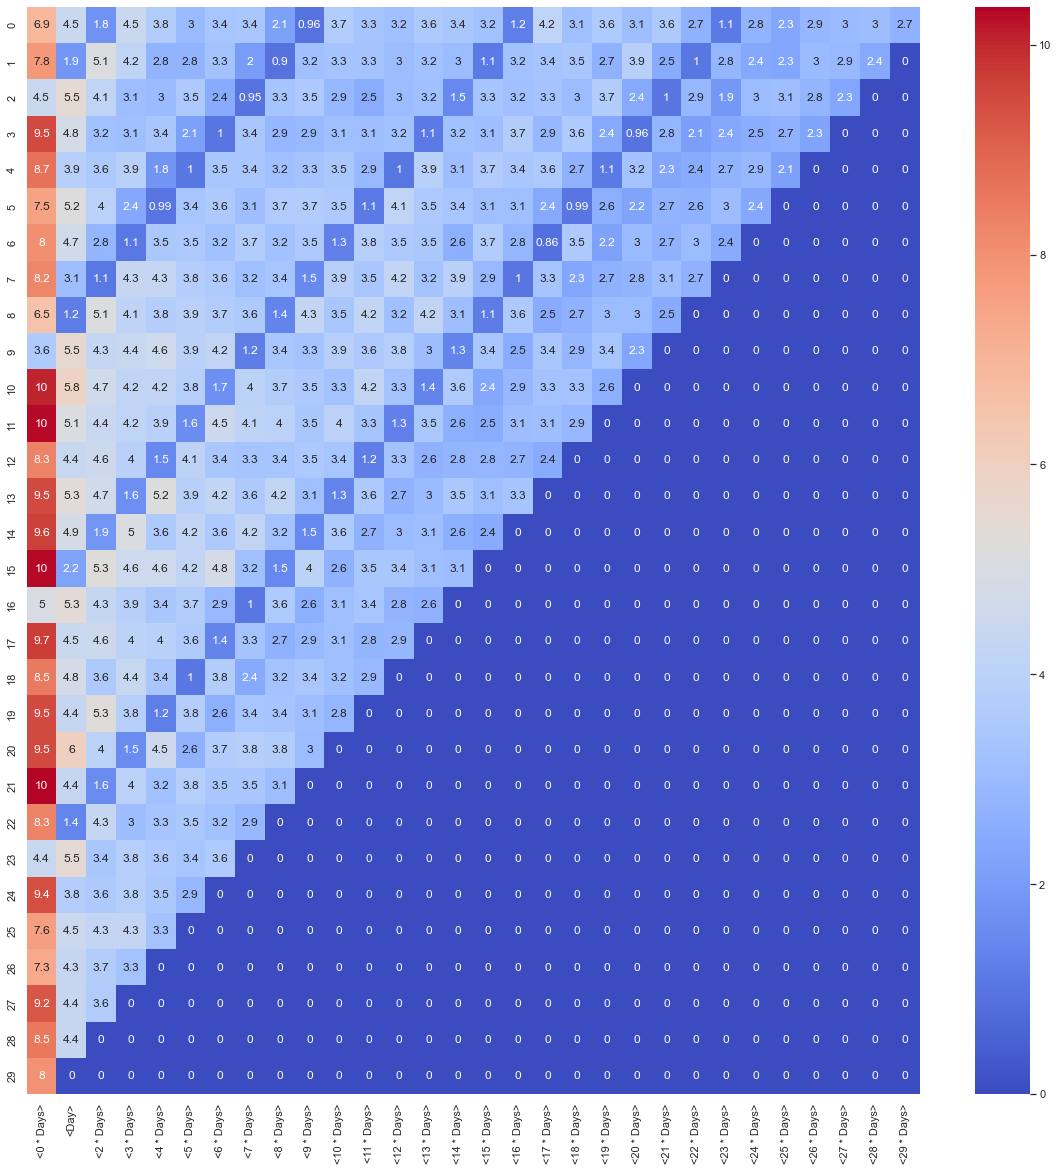

In [26]:
rr22 = round(xop22.div(xop22['DAU 2022'], axis=0)*100,2)
rr22.drop(columns=['DAU 2022'], inplace=True)

import seaborn as sns
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(rr22, annot=True, cmap="coolwarm")

In [27]:
cr22 = rr22 - 100
cr22

,<0 * Days>,<Day>,<2 * Days>,<3 * Days>,<4 * Days>,<5 * Days>,<6 * Days>,<7 * Days>,<8 * Days>,<9 * Days>,...,<20 * Days>,<21 * Days>,<22 * Days>,<23 * Days>,<24 * Days>,<25 * Days>,<26 * Days>,<27 * Days>,<28 * Days>,<29 * Days>
0,-93.10,-95.51,-98.22,-95.51,-96.24,-97.01,-96.62,-96.58,-97.88,-99.04,...,-96.91,-96.43,-97.30,-98.89,-97.25,-97.68,-97.15,-97.01,-96.96,-97.3
1,-92.19,-98.15,-94.89,-95.84,-97.25,-97.25,-96.74,-97.98,-99.10,-96.82,...,-96.14,-97.55,-98.97,-97.17,-97.64,-97.72,-97.04,-97.08,-97.60,-100.0
2,-95.52,-94.53,-95.87,-96.92,-97.01,-96.47,-97.56,-99.05,-96.67,-96.47,...,-97.61,-99.00,-97.11,-98.11,-96.97,-96.92,-97.21,-97.71,-100.00,-100.0
3,-90.49,-95.15,-96.78,-96.85,-96.59,-97.89,-99.00,-96.59,-97.15,-97.08,...,-99.04,-97.19,-97.93,-97.63,-97.48,-97.33,-97.74,-100.00,-100.00,-100.0
4,-91.31,-96.13,-96.40,-96.09,-98.20,-98.98,-96.52,-96.60,-96.83,-96.71,...,-96.75,-97.69,-97.57,-97.26,-97.10,-97.89,-100.00,-100.00,-100.00,-100.0
5,-92.51,-94.80,-96.01,-97.62,-99.01,-96.64,-96.41,-96.91,-96.32,-96.28,...,-97.76,-97.26,-97.35,-96.95,-97.62,-100.00,-100.00,-100.00,-100.00,-100.0
6,-91.96,-95.29,-97.18,-98.94,-96.51,-96.47,-96.78,-96.27,-96.78,-96.47,...,-97.02,-97.33,-96.98,-97.57,-100.00,-100.00,-100.00,-100.00,-100.00,-100.0
7,-91.78,-96.91,-98.92,-95.66,-95.70,-96.20,-96.37,-96.83,-96.62,-98.50,...,-97.25,-96.91,-97.29,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00,-100.0
8,-93.45,-98.81,-94.90,-95.91,-96.22,-96.09,-96.31,-96.40,-98.64,-95.74,...,-96.97,-97.54,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00,-100.0
9,-96.37,-94.47,-95.67,-95.61,-95.42,-96.06,-95.80,-98.79,-96.56,-96.69,...,-97.71,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00,-100.0


<div class="alert alert-block alert-warning">
<b> 3. Daily Active User (DAU)</b>
</div>

In [20]:
login_logs['Day'] = pd.to_datetime(login_logs['login_time']).dt.day
login_logs['Year'] = pd.to_datetime(login_logs['login_time']).dt.year
login_logs['Month'] = pd.to_datetime(login_logs['login_time']).dt.month
uni = login_logs.groupby(['Year', 'Day'])['user_id'].nunique()
uni = uni.to_frame().reset_index()
uni21 = uni.iloc[:30]
uni22 = (uni.iloc[30:]).reset_index()

pliz2 = pd.merge(uni21, uni22, on='Day', how='inner')
pliz2.drop(columns=['Year_x', 'index', 'Year_y'], inplace=True)
pliz2.rename(columns={'user_id_x':'DAU 2021', 'user_id_y':'DAU 2022'}, inplace=True)
pliz2

,Day,DAU 2021,DAU 2022
0,1,1563,2073
1,2,1519,2329
2,3,1485,2010
3,4,1128,2701
4,5,1536,2556
5,6,1507,2230
6,7,1526,2550
7,8,1586,2397
8,9,1561,2276
9,10,1551,1572


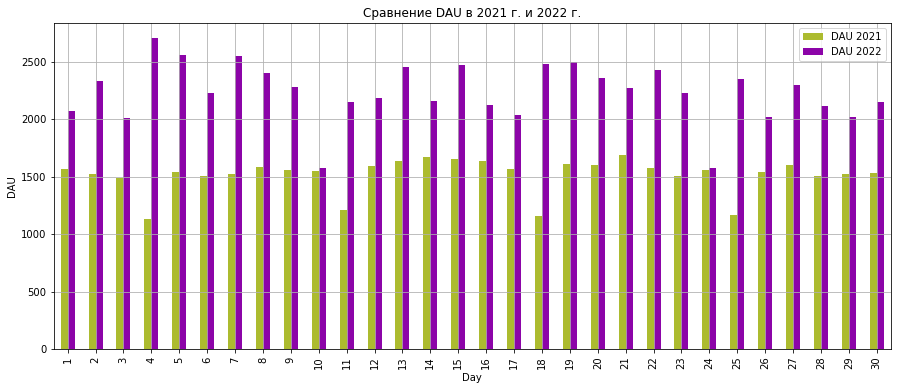

In [21]:
pliz2[['Day', 'DAU 2021', 'DAU 2022']].plot(x='Day', kind='bar', figsize=(15,6), color=['#ACBB2F','#8C04A8'])
plt.title('Сравнение DAU в 2021 г. и 2022 г.')
# plt.legend(['2021 г.', '2022 г.'])
plt.ylabel('DAU')
plt.grid()
plt.show()

<div class="alert alert-block alert-warning">
<b> 4. Monthly Active User (MAU)</b>
</div>

In [28]:
unim = login_logs.groupby(['Year', 'Month'])['user_id'].nunique()
unim = unim.to_frame().reset_index()
unim.rename(columns={'user_id':'MAU'}, inplace=True)
unim

,Year,Month,MAU
0,2021,7,10867
1,2022,7,13022


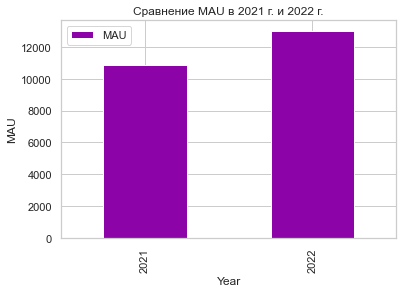

In [29]:
unim[['Year', 'MAU']].plot(x='Year', kind='bar', color=['#8C04A8'])
plt.title('Сравнение MAU в 2021 г. и 2022 г.')
# plt.legend(['2021 г.', '2022 г.'])
plt.ylabel('MAU')
plt.show()

<div class="alert alert-block alert-warning">
<b> 5. Наиболее популярные продаваемые товары (Топ-10)</b>
</div>

In [30]:
top = sales_orders_items.groupby('fk_product_id', as_index=False)['order_quantity_accepted'].sum()
top.sort_values(by=['order_quantity_accepted'], inplace=True, ascending=[False])
etop = top[:10]
etop

,fk_product_id,order_quantity_accepted
445,10235,1617
610,12547,1572
227,8219,1478
312,8444,1410
300,8428,1149
228,8221,1091
45,3610,936
614,12652,886
223,8210,652
120,7640,608


In [31]:
Revenue = pd.merge(sales_orders, sales_orders_items, left_on='order_id', right_on='fk_order_id')
prov = Revenue.groupby(['fk_product_id', 'Year'], as_index=False)['order_quantity_accepted'].sum()
provtop21 = prov[prov['Year'] == 2021]

provtop21.sort_values(by=['order_quantity_accepted'], inplace=True, ascending=[False])
provtop21[:10]

,fk_product_id,Year,order_quantity_accepted
600,10235,2021,1045
295,8219,2021,850
399,8428,2021,693
564,9925,2021,585
289,8210,2021,403
9,1040,2021,326
18,1548,2021,295
422,8444,2021,271
602,10236,2021,227
395,8425,2021,220


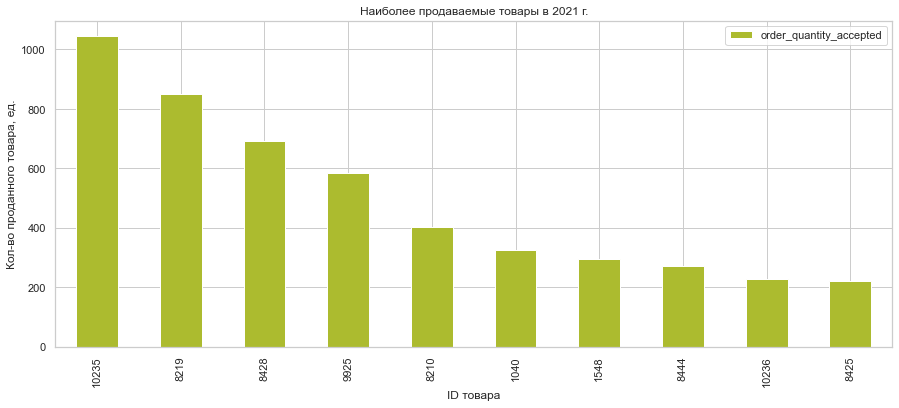

In [32]:
provtop21[:10][['fk_product_id', 'order_quantity_accepted']].plot(x='fk_product_id', kind='bar', figsize=(15,6), color=['#ACBB2F'])
plt.title('Наиболее продаваемые товары в 2021 г.')
plt.xlabel('ID товара')
plt.ylabel('Кол-во проданного товара, ед.')
plt.show()

In [33]:
provtop22 = prov[prov['Year'] == 2022]

provtop22.sort_values(by=['order_quantity_accepted'], inplace=True, ascending=[False])
provtop22[:10]

,fk_product_id,Year,order_quantity_accepted
837,12547,2022,1572
423,8444,2022,1139
298,8221,2022,879
66,3610,2022,779
842,12652,2022,732
296,8219,2022,628
601,10235,2022,572
30,2367,2022,534
895,12749,2022,517
827,12487,2022,489


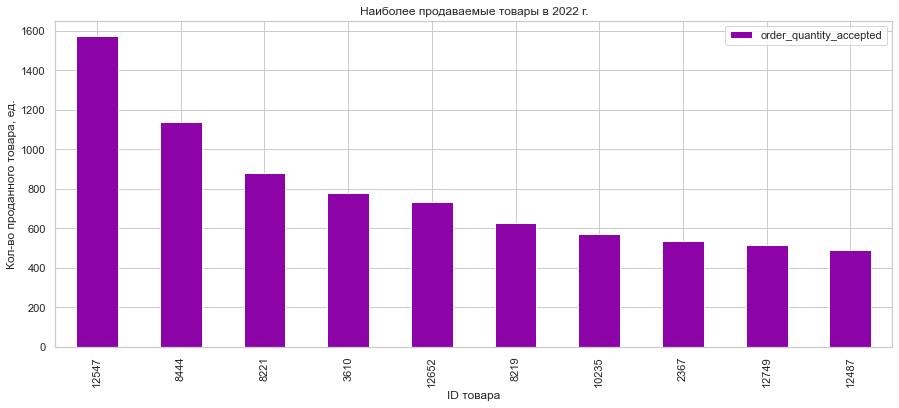

In [34]:
provtop22[:10][['fk_product_id', 'order_quantity_accepted']].plot(x='fk_product_id', kind='bar', figsize=(15,6), color=['#8C04A8'])
plt.title('Наиболее продаваемые товары в 2022 г.')
plt.xlabel('ID товара')
plt.ylabel('Кол-во проданного товара, ед.')
plt.show()

<div class="alert alert-block alert-warning">
<b> 6. Товары с самым высоким доходом</b>
</div>

In [35]:
Revenue = pd.merge(sales_orders, sales_orders_items, left_on='order_id', right_on='fk_order_id')
money = Revenue.groupby(['fk_product_id', 'Year'], as_index=False)['rate'].sum()
money21 = money[money['Year'] == 2021]
money21.sort_values(by=['rate'], inplace=True, ascending=False)
money211 = money21.round(1)[:10]
money211

,fk_product_id,Year,rate
642,10975,2021,3080639.0
295,8219,2021,2720317.4
18,1548,2021,2677049.8
289,8210,2021,2230863.9
422,8444,2021,1713101.1
65,3610,2021,1690242.0
176,7640,2021,1512815.1
12,1043,2021,1371113.8
10,1041,2021,1254233.7
778,11899,2021,1181516.7


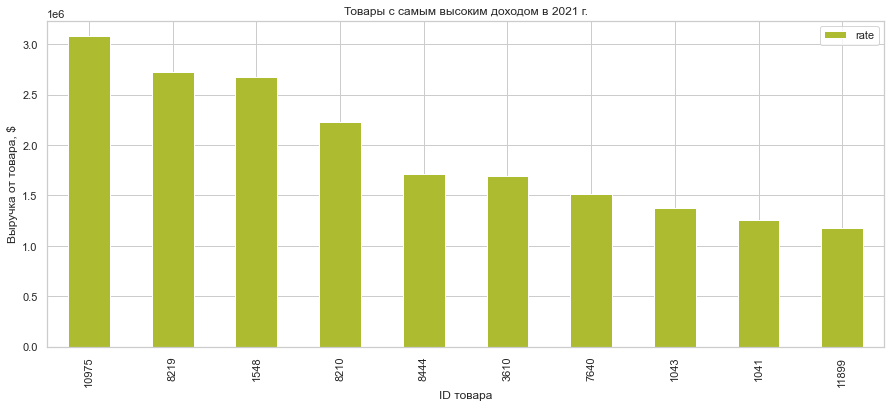

In [36]:
money211[['fk_product_id', 'rate']].plot(x='fk_product_id', kind='bar', figsize=(15,6), color=['#ACBB2F'])
plt.title('Товары с самым высоким доходом в 2021 г.')
plt.xlabel('ID товара')
plt.ylabel('Выручка от товара, $')
plt.show()

In [37]:
money22 = money[money['Year'] == 2022]
money22.sort_values(by=['rate'], inplace=True, ascending=False)
money222 = money22.round(1)[:10]
money222

,fk_product_id,Year,rate
66,3610,2022,3871059.0
643,10975,2022,3280684.0
423,8444,2022,2747635.0
296,8219,2022,2332692.0
757,11233,2022,2320207.0
177,7640,2022,2197726.0
13,1043,2022,2146868.0
290,8210,2022,1937175.0
11,1041,2022,1912337.0
7,1038,2022,1865934.0


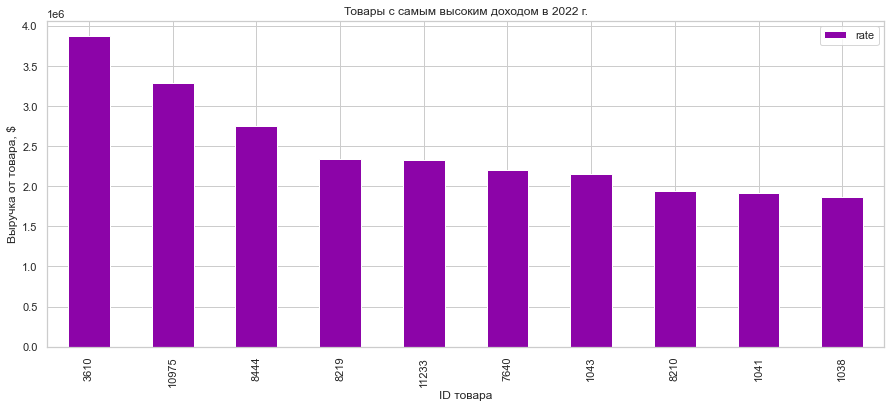

In [38]:
money222[['fk_product_id', 'rate']].plot(x='fk_product_id', kind='bar', figsize=(15,6), color=['#8C04A8'])
plt.title('Товары с самым высоким доходом в 2022 г.')
plt.xlabel('ID товара')
plt.ylabel('Выручка от товара, $')
plt.show()

In [39]:
# print(money.to_string(formatters={'Revenue':'${:,.2f}'.format}))
# money['Revenue2'] = money['rate'].map('${:,.2f}'.format)

<div class="alert alert-block alert-warning">
<b> 7. Объем выручки</b>
</div>

In [40]:
RevenueSum = Revenue.groupby('Year', as_index=False)['rate'].sum()
RevenueSum['Revenue'] = RevenueSum['rate'].map('${:,.2f}'.format)
RevenueSum

,Year,rate,Revenue
0,2021,5.448638e+07,"$54,486,379.49"
1,2022,7.504405e+07,"$75,044,054.82"
